In [28]:
import pandas as pd
from textblob import TextBlob
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
from google.colab import files
uploaded = files.upload()

Saving chrome_reviews.csv to chrome_reviews (1).csv


In [75]:
df=pd.read_csv("chrome_reviews.csv")
pd.set_option('display.max_rows',None)
df.head()

,ID,Review URL,Text,Star,Thumbs Up,User Name,Developer Reply,Version,Review Date,App ID
0,3886,https://play.google.com/store/apps/details?id=...,This is very helpfull aap.,5,0,INDIAN Knowledge,NaN,83.0.4103.106,2020-12-19,com.android.chrome
1,3887,https://play.google.com/store/apps/details?id=...,Good,3,2,Ijeoma Happiness,NaN,85.0.4183.127,2020-12-19,com.android.chrome
2,3888,https://play.google.com/store/apps/details?id=...,Not able to update. Neither able to uninstall.,1,0,Priti D BtCFs-29,NaN,85.0.4183.127,2020-12-19,com.android.chrome
3,3889,https://play.google.com/store/apps/details?id=...,Nice app,4,0,Ajeet Raja,NaN,77.0.3865.116,2020-12-19,com.android.chrome
4,3890,https://play.google.com/store/apps/details?id=...,Many unwanted ads,1,0,Rams Mp,NaN,87.0.4280.66,2020-12-19,com.android.chrome


In [76]:
df.drop(["ID","Review URL", "User Name","Developer Reply", "Version","Review Date","App ID"],axis=1,inplace=True)

In [77]:
df.head()

,Text,Star,Thumbs Up
0,This is very helpfull aap.,5,0
1,Good,3,2
2,Not able to update. Neither able to uninstall.,1,0
3,Nice app,4,0
4,Many unwanted ads,1,0


In [78]:
def text_process(text):
    text=str(text).lower()
    text=re.sub(r"[^\w\s]","",text)
    text=re.sub(r"[\d]","",text)
    return text

In [79]:
pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [80]:
def get_polarity(text):
    sentment=TextBlob(text=text)
    polarity=sentment.polarity
    return round(polarity,2)

In [81]:
def get_subjectivity(text):
    sentment=TextBlob(text=text)
    subjectivity=sentment.subjectivity
    return round(subjectivity,2)

In [82]:
df.Text=df.Text.apply(text_process)

In [83]:
df["polarity"]=df.Text.apply(get_polarity)

In [84]:
df["subjectivity"]=df.Text.apply(get_subjectivity)

In [85]:
df.head()

,Text,Star,Thumbs Up,polarity,subjectivity
0,this is very helpfull aap,5,0,0.20,0.30
1,good,3,2,0.70,0.60
2,not able to update neither able to uninstall,1,0,0.12,0.62
3,nice app,4,0,0.60,1.00
4,many unwanted ads,1,0,0.50,0.50


In [86]:
# lets see at what subjectivity we can say sentiment is quite strongly supports and can be confident 
df[df.subjectivity>0.5].head()

,Text,Star,Thumbs Up,polarity,subjectivity
1,good,3,2,0.70,0.60
2,not able to update neither able to uninstall,1,0,0.12,0.62
3,nice app,4,0,0.60,1.00
5,this app good,4,0,0.70,0.60
7,awesome,5,0,1.00,1.00


In [87]:
# lets see at what Polarity level we can say Polarity is quite Negative
df[df.polarity <= -0.3].head()

,Text,Star,Thumbs Up,polarity,subjectivity
8,very bad app,1,0,-0.91,0.87
32,it lags this days worst of it i cant even upda...,1,0,-1.00,1.00
37,i am unable to update my google chrome app thr...,1,0,-0.50,0.50
52,bad,1,0,-0.70,0.67
54,always demand for update and cant work properl...,1,0,-0.35,0.38


In [68]:
# with this we have Strongly Positive, Positive, Neutral , Strongly Neutral, Negative, Strongly Negative
def get_sentiment(polarity, subjectivity,rows):
    senti=[]
    for i in range(0,rows):
        if(subjectivity[i]>0.5):
            prefix = "strongly"
        else:
            prefix=""
        if(polarity[i] > 0.5):
            sentiment=prefix+" positive"
        elif(polarity[i] <= -0.3):
            sentiment = prefix+" Negative"
        else:
            sentiment = prefix + " Netural" 
        senti.append(sentiment)
    return senti

In [88]:
df["Sentiment"]=get_sentiment(df.polarity,df.subjectivity,len(df.polarity))

In [89]:
df.head()

,Text,Star,Thumbs Up,polarity,subjectivity,Sentiment
0,this is very helpfull aap,5,0,0.20,0.30,Netural
1,good,3,2,0.70,0.60,strongly positive
2,not able to update neither able to uninstall,1,0,0.12,0.62,strongly Netural
3,nice app,4,0,0.60,1.00,strongly positive
4,many unwanted ads,1,0,0.50,0.50,Netural


In [90]:
df[((df.Star==1) & ((df.Sentiment == 'strongly positive') | (df.Sentiment == 'positive')))]

,Text,Star,Thumbs Up,polarity,subjectivity,Sentiment
101,good,1,0,0.70,0.60,strongly positive
158,good,1,0,0.70,0.60,strongly positive
312,good,1,0,0.70,0.60,strongly positive
315,nice,1,0,0.60,1.00,strongly positive
371,good,1,0,0.70,0.60,strongly positive
389,good,1,0,0.70,0.60,strongly positive
424,good,1,0,0.70,0.60,strongly positive
540,it is good for gaming,1,0,0.70,0.60,strongly positive
775,good,1,0,0.70,0.60,strongly positive
807,good serving,1,0,0.70,0.60,strongly positive


In [48]:
length_strongpostive=len(df[((df.Star==1) & ((df.Sentiment == 'strongly positive') | (df.Sentiment == 'positive')))])
length_strongneutral=len(df[((df.Star==1) & ((df.Sentiment == 'strongly Netural') | (df.Sentiment == 'Netural')))])

In [24]:
print("There are {0} number of ratings with positive comments but with low rating".format(length_strongpostive))
print("There are {0} number of ratings with Neutral comments but with low rating".format(length_strongneutral))

There are 81 number of ratings with positive comments but with low rating
There are 250 number of ratings with Neutral comments but with low rating


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


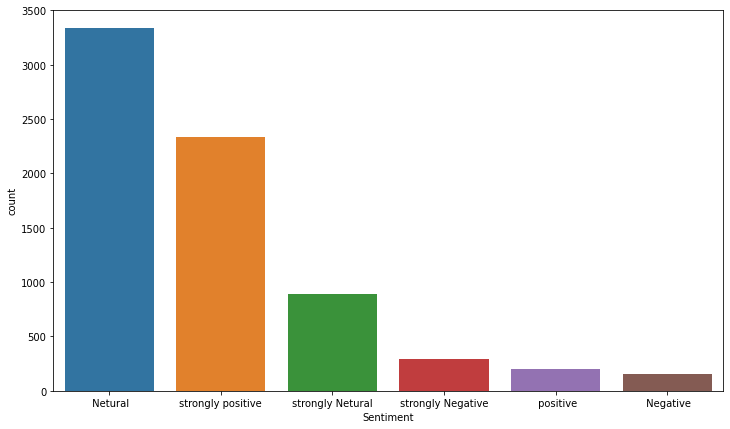

In [91]:
plt.figure(figsize=(12,7))
sns.countplot(df.Sentiment)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


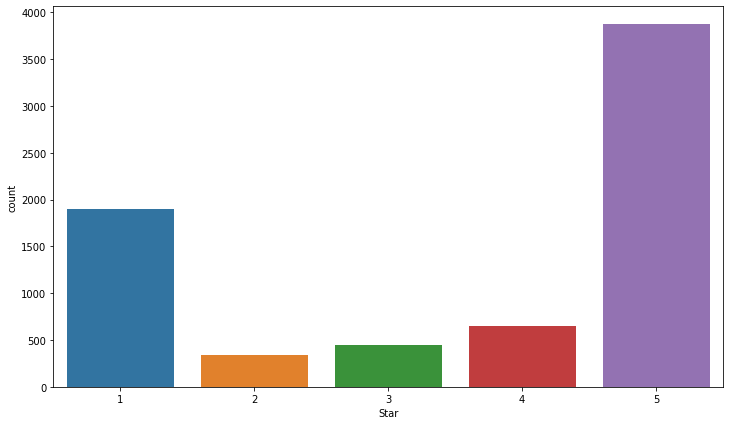

In [92]:
plt.figure(figsize=(12,7))
sns.countplot(df.Star)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

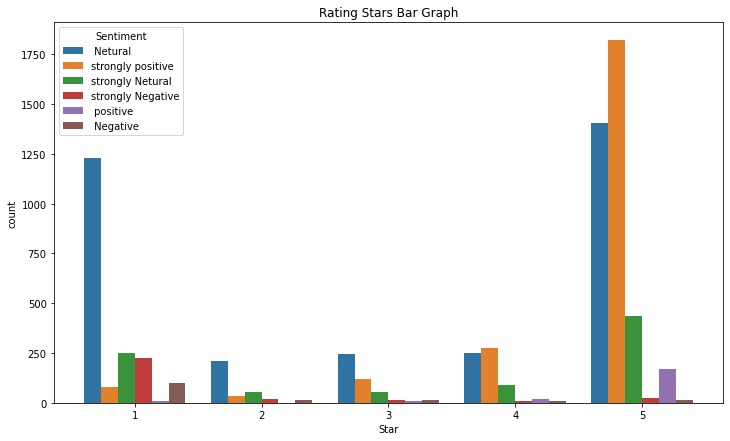

In [93]:
plt.figure(figsize=(12,7))
sns.countplot(df.Star,hue=df.Sentiment)
plt.title("Rating Stars Bar Graph")
plt.plot()